#<font color='#f1863d'> **Aprendizado de máquina (ML): conhecendo o classificador Naive Bayes e a biblioteca Sklearn**

O nome "Naive Bayes" é um termo genérico que se refere apenas a característica mais geral do classificador (isto é, a ingênua suposição de que as features são todas independentes entre si e igualmente importantes), não especificando, portanto, o tipo de distribuição assumida pelas features, que podem ser tanto contínuas quanto discretas. Por tal motivo, o Naive Bayes pode ser encontrado em três diferentes versões: Naive Bayes Multinomial (para dados discretos), Naive Bayes Gaussiano (para dados contínuos) e Naive Bayes de Bernoulli (para dados booleanos).

Para tratar dados de língua, geralmente opta-se pelo Naive Bayes Multinomial, que, embora mais simples e limitado, serve para dados que não podem ser representados numericamente, sendo, por isso, muito utilizado em problemas de classificação de texto.

A ideia seguida por tal algoritmo é bastante simples:

- Primeiro, quando nossos dados são textuais, os transformamos em suas versões numéricas;
- Depois, com os dados de treino, encontramos as probabilidades condicionais P(A|B) = P(A∩B) / P(B) -> P(palavra|classe) = P(palavra∩classe) / P(classe);
- Por último, sabendo quais as probabilidades de cada palavra pertencer às diferentes classe, encontramos qual a probabilidade de uma frase pertencer a uma determinada classe, considerando apenas as palavras que a compõem.

Esta é a ideia geral do algoritmo Naive Bayes, e, embora ela possa parecer um tanto complicada, a sua aplicação é muito simples! Veja como é fácil implementar nosso modelo a partir da biblioteca Sklearn:



```
# Para importar as dependências necessárias:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Para criar o modelo:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Para treinar o modelo com os dados de treino:
model.fit(*dados_de_treino, *labels_dos_dados_de_treino)

# Para predizer as categorias dos dados de teste:
predicted_categories = model.predict(*dados_de_teste)
```



E pronto! Com essas poucas linhas de código, os nossos dados de teste estariam rotulados. Restaría-nos, é claro, conferir o desempenho do nosso classificador a partir do uso de diferentes métricas de avaliação para que pudéssemos realizar alterações em nosso algoritmo, caso necessário. Mas essa etapa também é bastante simples: basta escolher algumas métricas de "sklearn.metrics" para realizar a checagem.

#<font color='#f1863d'> **Aplicação com corpus de brinquedo**

##<font color='#0660a2'> **Introdução**

Agora que já vimos alguns conceitos básicos de NLP e ML e ainda aprendemos a utilizar algumas bibliotecas dessas áreas, vamos aplicar nossos conhecimentos na resolução de um problema. Primeiro, vamos iniciar a leitura das bibliotecas necessárias:

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

Vamos apresentar o nosso dataset:

In [8]:
# Lendo o dataset:
df = pd.read_csv('Propagandas_LIMPAS.csv', index_col=0)    # Lembre-se de abrir o dataset em sua versão LIMPA!
df.reset_index(inplace = True)    # Deixa os índices no tipo [0, 1, ..., N-1].
df.head()

,Transcrição,Label
0,adoro porque deixa pele macia gosto porque dei...,1
1,uso deixa pele assim macia suave gostosa agora...,1
2,chegaram novas fragrancias inspiradas tradicao...,1
3,dizem jeitos romanticos declarar amor colocar ...,1
4,deixa pele macia cheirosa gostosa principalmen...,1


Temos, novamente, nosso conjunto de publicidades voltadas ao público feminino ou masculino, que foi visto na primeira parte do workshop.

A nossa tarefa será a de criar um classificador que rotule nossos dados corretamente. Repare: o conteúdo de cada comercial parece ser estereotipado de acordo com o seu público-alvo; assim, considerando o que vimos nesse curso, poderemos facilmente criar tal classificador com a técnica "Bag-of-Words" e o modelo "Naive Bayes"!

Vale mencionar que, embora o corpus aqui apresentado seja muito mais simples do que normalmente encontramos em casos reais, as técnicas apresentadas podem, sim, serem usadas para aplicações concretas! Inclusive, em breve vocês desenvolverão um detector de spam seguindo os mesmos passos que serão aqui apresentados  :)

Enfim, vamos à aplicação:

##<font color='#0660a2'> **Pré-processamento dos dados**

Embora essa versão dos dados esteja quase completamente pré-processada, podemos perceber que as frases não foram lematizadas nem stemizadas, e também não foi gerado o bag-of-words. Então, como uma pequena revisão, vamos realizar esses passos:

In [9]:
# Tokenizando os dados para realizar a stemização e lematização:
from nltk.tokenize import word_tokenize  # Para dividir em palavras.
nltk.download('punkt')   # Modelo treinado para identificar os pontos nos quais uma sentença ou palavra termina e outra começa, garantindo uma tokenização inteligente.
df['Transcrição'] = df['Transcrição'].apply(word_tokenize)

# Stemizando nosso texto com o LancasterStemmer (repare que estamos usando um stemmer diferente da primeira aula! Este é mais "agressivo"):
lancaster = nltk.LancasterStemmer()
lancaster_list = []
for i in range(len(df.Transcrição)):
    lancaster_tokens = []
    for word in df.Transcrição[i]:
        lancaster_tokens.append(lancaster.stem(word))
    lancaster_list.append(lancaster_tokens)

# Juntando a lista de listas de palavras em uma lista de sentenças:
lancaster_text = []
for i in lancaster_list:
     lancaster_text.append(' '.join(i))

# Substituindo nossos valores antigos de "Transcrição" pelas novas frases stemizadas:
df.Transcrição = lancaster_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
df.head()

,Transcrição,Label
0,adoro porqu deix pel mac gosto porqu deix pel ...,1
1,uso deix pel assim mac suav gostos agor novo p...,1
2,chegaram nova fragrancia inspirada tradicao or...,1
3,dizem jeito romantico declar am coloc verso pe...,1
4,deix pel mac cheiros gostos princip hidratad v...,1


Por fim, resta-nos apenas separá-los em "treino" e "teste" para facilitar nosso trabalho. Observe como é simples:

In [11]:
# Dividindo nossos dados em treino e teste:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(df.Transcrição, df.Label, test_size=0.2, stratify=df.Label, random_state=42)

# Arrumando os índices (opcional):
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)    # Essas labels NÃO podem entrar no treinamento do nosso modelo! Seria como dar o gabarito de uma prova antes de aplicá-la.

##<font color='#0660a2'> **Bag-of-words**

Agora, vamos criar o nosso saco-de-palavras (BOW) a partir dessas raízes de palavras. Mas antes de usar a nossa função de BOW, precisamos formatar os nossos dados textuais para que eles sejam listas de frases:

In [12]:
print('Dado de treino antes da formatação: \n', train)

# Formatando:
train = train.tolist()
test = test.tolist()

print('\nDado de treino depois da formatação: \n', train)

Dado de treino antes da formatação: 
 0    poderoso encontre protecao contr suor mal chei...
1    descubr forc sentirs bem propr pel nov linh cu...
2    flor colhida ant amanhec estao perfumada criam...
3    adoro porqu deix pel mac gosto porqu deix pel ...
4    novo refresc cabelo barb multifunt pre pos bar...
5    dizem jeito romantico declar am coloc verso pe...
6    chegaram nova fragrancia inspirada tradicao or...
7    prometo am respeit cuid voc prometo seguir sen...
8    uso deix pel assim mac suav gostos agor novo p...
Name: Transcrição, dtype: object

Dado de treino depois da formatação: 
 ['poderoso encontre protecao contr suor mal cheiro torn homem legendario assim vent barreira homem anim', 'descubr forc sentirs bem propr pel nov linh cuidado pessoa perfumar', 'flor colhida ant amanhec estao perfumada criamo revel lado ousado', 'adoro porqu deix pel mac gosto porqu deix pel cheiros gosto porqu deix pel gostos', 'novo refresc cabelo barb multifunt pre pos barb fragranc amade

Também precisamos juntar os nossos dados de treino com nossos dados de teste em uma única lista, já que a função de BOW precisa processá-los juntos.

In [13]:
all_sentences = train + test
print('Frases juntas em uma única lista:\n', all_sentences)

Frases juntas em uma única lista:
 ['poderoso encontre protecao contr suor mal cheiro torn homem legendario assim vent barreira homem anim', 'descubr forc sentirs bem propr pel nov linh cuidado pessoa perfumar', 'flor colhida ant amanhec estao perfumada criamo revel lado ousado', 'adoro porqu deix pel mac gosto porqu deix pel cheiros gosto porqu deix pel gostos', 'novo refresc cabelo barb multifunt pre pos barb fragranc amadeirad fresc intenso elo bem', 'dizem jeito romantico declar am coloc verso petala flor carib fale momento perfeito cri voc arrisques am novo', 'chegaram nova fragrancia inspirada tradicao ory flor cerejeir', 'prometo am respeit cuid voc prometo seguir sentir energ prometo lev voc mim todo dia sint potenc fresc agor nov embalagem feit plastico retirado lit', 'uso deix pel assim mac suav gostos agor novo perfum nov embalagem sensac', 'deix pel mac cheiros gostos princip hidratad voc tambem quer ter pel bonit bem tratad us', 'tod emocao busc aventur agrest refresc sig 

E vamos para a função!

In [14]:
# Importando as dependências necessárias:
from sklearn.feature_extraction.text import CountVectorizer

def bow(textos):
  """ Entrada: uma lista de textos limpos.
  Saída: um vetor que indica quais são as palavras presentes nos textos e a quantidade de vezes que tais vocábulos aparecem. """
  vectorizer = CountVectorizer()    # Cria um objeto do tipo "Vetor de Contagem".
  frequencies = vectorizer.fit_transform(textos).toarray()    # Modeliza os textos de acordo com o vetor (transforma em contagens).
  return frequencies

# Aplicando a função de BOW em nosso conjunto de dados:
bow_all = bow(all_sentences)

Por fim, resta-nos separar novamente nossos dados em treino e teste, do jeito que estavam antes.

In [15]:
train = (bow_all)[:len(train)]    # Do zero até o tamanho da lista de frases de treino, já que "train" veio antes.
test = (bow_all)[-len(test):]    # De trás para frente, do último item até o tamanho da lista de frases de teste, já que "test" veio depois.

##<font color='#0660a2'> **Implementação do algoritmo Naive Bayes**

Mais uma vez, antes de mexermos, de fato, com o modelo, precisamos primeiro verificar a formatação dos nossos dados. O algoritmo NB do Sklearn exige os seguintes formatos:
- Para as labels (treino e teste), precisamos apenas de uma lista de valores. Exemplo:
```
train_lb_ex = [0, 1, 0, 1, 0, 1, 0, 1, 0]
```
- Já para as outras variáveis, o modelo exige uma matriz de duas dimensões (2D array), sendo uma dimensão composta pelo número de amostras ("samples", ou simplesmente linhas da tabela) e, a outra, pelo número de características ("features", ou simplesmente colunas da tabela). No nosso caso, temos apenas uma feature - que seria o texto da propaganda -, e, portanto, teremos uma matriz 2D (n_amostras, 1). Exemplo:
```
train_ex =
array[[0, 0, 0, ... 0, 0, 0],
       [0, 0, 0, ... 0, 0, 0],
       [0, 0, 0, ... 0, 1, 0],
       ...
       [0, 0, 0, ... 0, 0, 0],
       [1, 0, 0, ... 0, 0, 0]]
```

Vamos avaliar nossos dados:

In [16]:
print('Dados de treino: \n', train)
print('Dados de teste: \n',test)
print('Labels de treino: \n', train_labels)
print('Labels de teste: \n', test_labels)

Dados de treino: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 2]
 [0 0 1 ... 0 0 0]]
Dados de teste: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
  0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 2 1 0 1 0]]
Labels de treino: 
 0    0
1    0
2    1
3    1

Ótimo! precisamos apenas mudar o formato das nossas labels, então.

In [17]:
train_labels = train_labels.to_list()
test_labels = test_labels.to_list()

Com nossos dados devidamente formatados, podemos finalmente importar o modelo pronto do Sklearn para rodar nosso Naive Bayes:

In [18]:
# Para importar as dependências necessárias:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Para criar o modelo:
model = MultinomialNB()

# Para treinar o modelo com os dados de treino:
model.fit(train, train_labels)

# Para predizer as categorias dos dados de teste:
predicted_categories = model.predict(test)

In [19]:
print('As labels preditas são:', predicted_categories)

As labels preditas são: [1 0 0]


Viu como é fácil? O uso do modelo é bem simples já que temos a ajuda de bibliotecas, então a implementação não passa de uma "receita de bolo". O problema está mais no tratamento dos dados, mesmo, já que o modelo só aceita um formato específico.

##<font color='#0660a2'> **Verificação do desempenho do modelo**

Por último, precisamos avaliar se o desempenho foi satisfatório! Nenhum modelo está completo sem a sua métrica de avaliação  :)

Para essa verificação, usaremos a matriz de confusão, que, como vimos, é uma métrica bastante completa. Também imprimiremos a acurácia, apenas para garantir...

A acurácia encontrada é de: 1.0


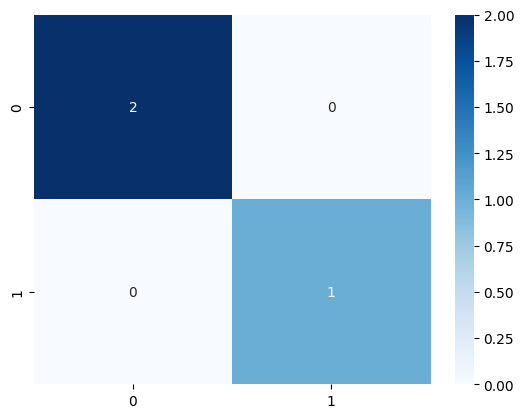

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Plotando uma matriz de confusão:
matrix = confusion_matrix(test_labels, predicted_categories)
sns.heatmap(matrix, annot=True, cmap='Blues')

# Verificando a acurácia:
accuracy = accuracy_score(test_labels, predicted_categories)
print('A acurácia encontrada é de:', accuracy)

E fim!